<a href="https://colab.research.google.com/github/r42arty/hse/blob/main/TMP/Mina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center> Практическое домашнее задание 1 </center>

*`credits to ML course by E. Sokolov`*

### Общая информация

Дата выдачи: 01.02.2025

Первый дедлайн: 07:59MSK 20.02.2025

Второй дедлайн: 07:59MSK 24.02.2025

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки `pandas` и визуализации с помощью `matplotlib`. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи).

**Штраф за каждый день просрочки мягкого дедлайна**: 0.5 баллов. После жесткого дедлайна работы не принимаются.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник.

### Формат сдачи
Задания сдаются через гугл-форму https://forms.gle/pT6CtSPNRXoqd64d6. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода.

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*.

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [ ]:
# ячейка с кодом, при выполнении которой появится output
2 + 2

4

Ячейка с неразмеченным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [ ]:
print(r" /\_/\ ")
print(r"( 0.0 )")
print(r" > ^ < ")

 /\_/\ 
( 0.0 )
 > ^ < 


*Математическое ожидание* для экспоненциального распределения:
$
\mathbb{E}[X] = \frac{1}{\lambda}
$

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб?

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [ ]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Скачаем подготовленные данные командой ниже:

In [ ]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

'wget' is not recognized as an internal or external command,
operable program or batch file.


**В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.**

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

In [ ]:
df = pd.read_excel("_end_seminar.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 361 entries, 0 to 360
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      361 non-null    datetime64[ns]
 1   id             361 non-null    object        
 2   rating         361 non-null    int64         
 3   18_group       223 non-null    float64       
 4   is_mi          18 non-null     float64       
 5   fall_1         361 non-null    object        
 6   fall_2         361 non-null    object        
 7   fall_3         361 non-null    object        
 8   spring_1       361 non-null    object        
 9   spring_2       361 non-null    object        
 10  spring_3       361 non-null    object        
 11  is_first_time  359 non-null    object        
 12  percentile     361 non-null    float64       
 13  17_group       138 non-null    float64       
 14  blended        138 non-null    object        
 15  is_ml_student  57 non-n

In [ ]:
df.tail()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,,0.369565,176.0,Соревновательный анализ данных,0.0


#### 2. [1 балл] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

Кол-во пропусков в колонках отображены ниже:

In [ ]:
df.isnull().sum()

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [ ]:
df = df.fillna({col: '' for col in df.select_dtypes(include='object').columns})
df = df.fillna({col: 0 for col in df.select_dtypes(include='number').columns})

#### 3. [1 балл] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [ ]:
print('Кол-во ответов "Нет":', len(df[df['is_first_time']=='Нет']))

Кол-во ответов "Нет": 51


In [ ]:
df = df[~df['id'].duplicated(keep='last')]

#### 4. [1 балл] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [ ]:
seniors = df[df['17_group'] != 0.0]
juniors = df[df['18_group'] != 0.0]

In [ ]:
print("Заявок из групп 17-го года набора:", len(seniors))
print("Заявок из групп 18-го года набора:",  len(juniors))

Заявок из групп 17-го года набора: 134
Заявок из групп 18-го года набора: 213


In [ ]:
has_duplicates = df["percentile"].duplicated(keep=False).any()
print("Есть студенты с равными перцентилями:", has_duplicates)

Есть студенты с равными перцентилями: True


#### 5. [1 балл] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [ ]:
print("Blended-курсы для четверокурсников:", seniors['blended'].unique())

Blended-курсы для четверокурсников: ['DevOps' 'Введение в дифференциальную геометрию'
 'Соревновательный анализ данных']


Метод .idxmax() взят с [этой](https://www.geeksforgeeks.org/find-maximum-values-position-in-columns-and-rows-of-a-dataframe-in-pandas/) страницы.

In [ ]:
popular_course = seniors.groupby('blended')['id'].count().idxmax()
popular_course_num = seniors.groupby('blended')['id'].count().max()
print(f"Blended-курс, на который записалось наибольшее количество студентов, равное {popular_course_num}, - {popular_course}.")

Blended-курс, на который записалось наибольшее количество студентов, равное 87, - DevOps.


Метод .nlargest() взят с [этой](https://stackoverflow.com/questions/76077005/how-to-get-the-n-largest-values-from-a-pandas-data-frame-and-label-them-as-1) страницы.

In [ ]:
top_course = seniors.groupby('blended')['rating'].mean().nlargest(1).index[0]

# Подсчитать количество студентов в этом blended-курсе
top_course_num = seniors['blended'].value_counts()[top_course]

print(f"У blended-курс с самым высоким средним рейтингом, {top_course}, количество студентов: {top_course_num}")

У blended-курс с самым высоким средним рейтингом, Введение в дифференциальную геометрию, количество студентов: 15


#### 6. [1.5 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

Метод .reset_index() взят с [этой](https://stackoverflow.com/questions/17995024/how-to-assign-a-name-to-the-size-column) и [этой](https://pandas.pydata.org/docs/reference/api/pandas.Series.reset_index.html) страниц.

In [ ]:
choices_pool = df.groupby(['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']).size().reset_index(name='count')
choices_pool[choices_pool['count'] > 1]

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,count
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2
155,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Машинное обучение 2,Компьютерные сети,Промышленное программирование на языке Java,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

Метод .stack() взят с [этой](https://stackoverflow.com/questions/61690295/python-pandas-convert-columns-into-rows) страницы.

In [ ]:
course_cols = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']

juniors_courses = set(df[df['18_group'] != 0.0][course_cols].stack().unique()) - {''}
seniors_courses = set(df[df['17_group'] != 0.0][course_cols].stack().unique())

common_courses = seniors_courses & juniors_courses

print("Курсы, на которые записывались как студенты 18-го года набора, так и студенты 17-го года:\n", common_courses)

Курсы, на которые записывались как студенты 18-го года набора, так и студенты 17-го года:
 {'Принятие решений в условиях риска и неопределённости', 'Statistical Learning Theory', 'Безопасность компьютерных систем', 'Моделирование временных рядов', 'Численные методы', 'Высокопроизводительные вычисления', 'Сбор и обработка данных с помощью краудсорсинга'}


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [ ]:
juniors_only = juniors_courses - seniors_courses
seniors_only = seniors_courses - juniors_courses

print("Курсы, на которые записались только студенты 17-ого года набора:\n", seniors_only)
print("Курсы, на которые записались только студенты 18-ого года набора:\n", juniors_only)

Курсы, на которые записались только студенты 17-ого года набора:
 {'Символьные вычисления', 'Конфликты и кооперация', 'Глубинное обучение в обработке звука', 'Генеративные модели в машинном обучении', 'Анализ неструктурированных данных', 'Компьютерное зрение', 'Обучение с подкреплением', 'Методы сжатия и передачи медиаданных', 'DevOps', 'Байесовские методы машинного обучения', 'Соревновательный анализ данных', 'Проектирование и разработка высоконагруженных сервисов', 'Введение в дифференциальную геометрию'}
Курсы, на которые записались только студенты 18-ого года набора:
 {'Системы баз данных', 'Компьютерные сети', 'Теория баз данных', 'Дискретная оптимизация', 'Дополнительные главы прикладной статистики', 'Анализ данных в бизнесе', 'Матричные вычисления', 'Язык SQL', 'Промышленное программирование на языке Java', 'Машинное обучение 2'}


### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё.

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>plt.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

In [ ]:
df['date'] = df['timestamp'].dt.date
avg_ratings = df.groupby('date')['rating'].mean().sort_index()

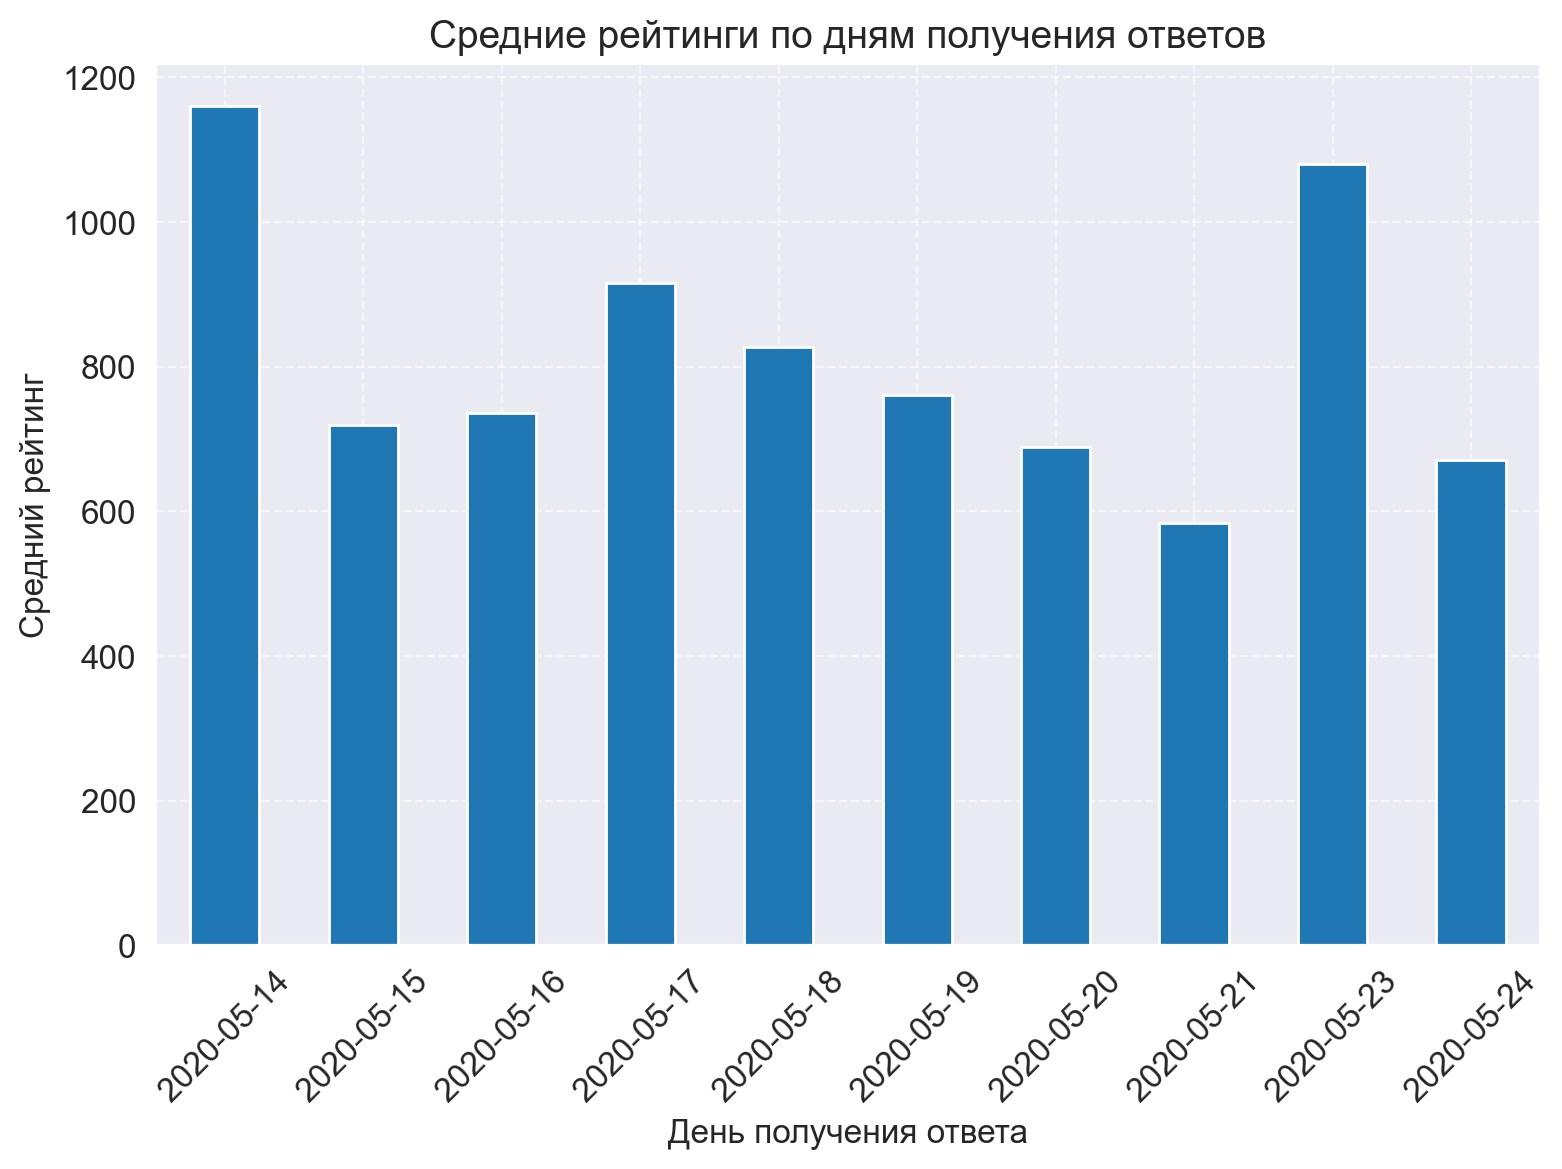

In [ ]:
avg_ratings.plot(kind='bar', color='tab:blue')

plt.xlabel("День получения ответа")
plt.ylabel("Средний рейтинг")

plt.title("Средние рейтинги по дням получения ответов", fontsize=14)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [ ]:
plt.savefig("avg_ratings_by_day.pdf")

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [ ]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1.5 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [ ]:
condition_17 = (df['17_group'].isin([171, 172, 173]))
condition_18 = (df['18_group'] != 0.0) & (df['is_mi'] == True)

df['fall_count'] = 1
df.loc[condition_17 | condition_18, 'fall_count'] = 2

Проверка:

In [ ]:
col_name = 'fall_count'   # insert your new column name as str

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("first_edit_hw1.csv")

In [ ]:
df.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,date,fall_count
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,NaN,0.0,2020-05-15,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,NaN,0.0,2020-05-15,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,NaN,0.0,2020-05-15,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,NaN,0.0,2020-05-15,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,NaN,0.0,2020-05-15,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   timestamp      347 non-null    object 
 1   id             347 non-null    object 
 2   rating         347 non-null    int64  
 3   18_group       347 non-null    float64
 4   is_mi          347 non-null    float64
 5   fall_1         347 non-null    object 
 6   fall_2         347 non-null    object 
 7   fall_3         347 non-null    object 
 8   spring_1       347 non-null    object 
 9   spring_2       347 non-null    object 
 10  spring_3       347 non-null    object 
 11  is_first_time  345 non-null    object 
 12  percentile     347 non-null    float64
 13  17_group       347 non-null    float64
 14  blended        134 non-null    object 
 15  is_ml_student  347 non-null    float64
 16  date           347 non-null    object 
 17  fall_count     347 non-null    int64  
dtypes: float64

Метод .apply() для GroupBy взят с [документации](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.apply.html), .map() взят с [StackOverflow](https://stackoverflow.com/questions/71532360/label-a-column-based-on-the-value-of-another-column-same-row-in-pandas-datafra), .agg() взят с [StackOverflow1](https://stackoverflow.com/questions/38127209/how-to-use-groupby-to-concatenate-strings-in-python-pandas) и [StackOverflow2](https://stackoverflow.com/questions/12589481/multiple-aggregations-of-the-same-column-using-pandas-groupby-agg)

In [ ]:
# ограничения по кол-ву мест
capacity_dict = {
    'Statistical Learning Theory': 60,
    'Высокопроизводительные вычисления': 60,
    'Анализ неструктурированных данных': np.inf
}
def_cap = 30

# Создаем общий df с кандидатами.
cand1 = df[df['fall_1'] != ""][['id', 'fall_1', 'percentile']].copy()
cand1 = cand1.rename(columns={'fall_1': 'course'})

cand2 = df[(df['fall_count'] == 2) & (df['fall_2'] != "")][['id', 'fall_2', 'percentile']].copy()
cand2 = cand2.rename(columns={'fall_2': 'course'})

all_candidates = pd.concat([cand1, cand2], ignore_index=True)

# Для каждого курса отбираем лучших кандидатов (с наименьшим percentile) с учётом лимита.
def select_top(group):
    cap = capacity_dict.get(group.name, def_cap)
    group_sorted = group.sort_values('percentile')
    return group_sorted if cap == np.inf else group_sorted.head(int(cap))

assigned = all_candidates.groupby('course', group_keys=False).apply(select_top).reset_index(drop=True)

# -------------

# Подсчитаем количество зачисленных по каждому курсу для статистики
course_counts = assigned.groupby('course').size().reset_index(name='enrolled_count')
course_counts['capacity'] = course_counts['course'].map(lambda x: capacity_dict.get(x, def_cap))

# -------------

# Собираем для каждого студента список зачисленных курсов в виде строки с разделителем ", "
assigned_by_student = assigned.groupby('id')['course'].agg(lambda courses: ", ".join(courses)).reset_index()

# Объединяем результат с исходным DataFrame
df = df.merge(assigned_by_student, on='id', how='left')
# Если студент не зачислен ни на один курс – получаем пустую строку
df['fall_courses'] = df['course'].fillna("")
df.drop(columns=['course'], inplace=True)

# Проставление флагов is_first_place и is_last_place

course_stats = assigned.groupby('course').agg(
    min_pct=('percentile', 'min'),
    max_pct=('percentile', 'max'),
    count=('id', 'count')
).reset_index()

assigned = assigned.merge(course_stats, on='course', how='left')
assigned['is_first'] = assigned['percentile'] == assigned['min_pct']
# Если по курсу зачислен единственный студент, он не считается худшим
assigned['is_last'] = (assigned['count'] > 1) & (assigned['percentile'] == assigned['max_pct'])

student_flags = assigned.groupby('id').agg(
    is_first_place=('is_first', 'any'),
    is_last_place=('is_last', 'any')
).reset_index()

# Преобразуем False в NaN (оставляем только True или NaN)
student_flags['is_first_place'] = student_flags['is_first_place'].replace({False: np.nan})
student_flags['is_last_place'] = student_flags['is_last_place'].replace({False: np.nan})

df = df.merge(student_flags, on='id', how='left')

# -------------

print(course_counts.to_string(index=False))
print()

sorted_df = df.sort_values('id', ascending=True).reset_index(drop=True)

                                              course  enrolled_count  capacity
                         Statistical Learning Theory              33      60.0
                   Анализ неструктурированных данных              48       inf
               Байесовские методы машинного обучения              24      30.0
                    Безопасность компьютерных систем              30      30.0
                   Высокопроизводительные вычисления              45      60.0
                Глубинное обучение в обработке звука              23      30.0
                                Матричные вычисления              15      30.0
                       Моделирование временных рядов              30      30.0
Принятие решений в условиях риска и неопределённости               8      30.0
     Сбор и обработка данных с помощью краудсорсинга              30      30.0
                                   Теория баз данных              14      30.0
                                            Язык SQL

Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [ ]:
#!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('_2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [ ]:
fir_col_name = 'is_first_place'     # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'    # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


In [ ]:
assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [ ]:
df = pd.read_csv("first_edit_hw1.csv")

Метод .to_string() взят с [документации](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_string.html)

In [ ]:
# Вспомогательные ф-ции

def stats_table_output(title, assigned_df, course_cap, def_cap=30):
    counts = assigned_df.groupby('course').size().to_dict()
    data = []
    for course, cnt in sorted(counts.items()):
        lim_val = course_cap.get(course, def_cap)
        l_str = 'inf' if lim_val == np.inf else str(lim_val)
        data.append([course, cnt, l_str])
    tbl = pd.DataFrame(data, columns=["course", "enrolled_count", "capacity"])
    print(title)
    print(tbl.to_string(index=False))
    print()

def allocate_wave_candidates(candidates, already_assigned, course_cap, def_cap=30):
    """
    Из candidates DataFrame (со столбцами: id, course, percentile) выбирает те заявки,
    для которых еще есть места (с учетом уже назначенных).
    Возвращает DataFrame с новыми назначениями.
    """
    current_counts = already_assigned.groupby('course').size().rename('current_count').reset_index()
    cand = candidates.merge(current_counts, on='course', how='left')
    cand['current_count'] = cand['current_count'].fillna(0)
    cand['capacity'] = cand['course'].map(lambda x: course_cap.get(x, def_cap))
    cand['remaining'] = cand['capacity'] - cand['current_count']
    cand = cand[cand['remaining'] > 0]
    if cand.empty:
        return pd.DataFrame(columns=['id','course','percentile'])
    def select_for_course(group):
        rem = group['remaining'].iloc[0]
        group_sorted = group.sort_values('percentile')
        if np.isinf(rem):
            return group_sorted
        else:
            return group_sorted.head(int(rem))
    new_assignments = cand.groupby('course', group_keys=False).apply(select_for_course).reset_index(drop=True)
    return new_assignments

def update_assignments(new_assignments, already_assigned, df, assigned_col='fall_courses'):
    """
    Обновляет общий список назначенных заявок и исходный DataFrame df (в колонке assigned_col).
    """
    updated = pd.concat([already_assigned, new_assignments], ignore_index=True)
    new_assignments_grouped = new_assignments.groupby('id')['course'].agg(list).reset_index()
    df_updated = df.merge(new_assignments_grouped, on='id', how='left', suffixes=("", "_new"))
    df_updated[assigned_col] = df_updated[assigned_col].fillna("")
    df_updated[assigned_col] = df_updated.apply(
        lambda row: row[assigned_col] + (", " if row[assigned_col] and isinstance(row['course'], list) else "") +
                    ", ".join(row['course']) if isinstance(row['course'], list) else row[assigned_col],
        axis=1)
    df.update(df_updated[[assigned_col]])
    return updated, df


# Запуск

df['fall_courses'] = ""

fall_course_cap = {
    'Statistical Learning Theory': 60,
    'Высокопроизводительные вычисления': 60,
    'Анализ неструктурированных данных': np.inf
}
def_cap = 30

# Волна 1
cand_wave1_1 = df[df['fall_count'] == 1][['id', 'fall_1', 'percentile']].copy().rename(columns={'fall_1':'course'})
cand_wave1_2 = df[df['fall_count'] == 2][['id', 'fall_1', 'percentile']].copy().rename(columns={'fall_1':'course'})
cand_wave1_3 = df[df['fall_count'] == 2][['id', 'fall_2', 'percentile']].copy().rename(columns={'fall_2':'course'})
candidates_wave1 = pd.concat([cand_wave1_1, cand_wave1_2, cand_wave1_3], ignore_index=True)
candidates_wave1 = candidates_wave1[candidates_wave1['course'] != ""]

already_assigned = pd.DataFrame(columns=['id','course','percentile'])
wave1_new = allocate_wave_candidates(candidates_wave1, already_assigned, fall_course_cap, def_cap)
already_assigned, df = update_assignments(wave1_new, already_assigned, df, 'fall_courses')

wave1_counts = already_assigned.groupby('course').size().to_dict()
stats_table_output("After Wave 1:", already_assigned, fall_course_cap, def_cap)

# Волна 2
df['assigned_count'] = df['fall_courses'].apply(lambda x: 0 if x == "" else len(x.split(", ")))
cand_wave2 = df[(df['fall_count'] == 2) & (df['assigned_count'] < 2) & (df['fall_3'] != "")][['id', 'fall_3', 'percentile']].copy()
cand_wave2 = cand_wave2.rename(columns={'fall_3':'course'})
wave2_new = allocate_wave_candidates(cand_wave2, already_assigned, fall_course_cap, def_cap)
already_assigned, df = update_assignments(wave2_new, already_assigned, df, 'fall_courses')

wave2_counts = already_assigned.groupby('course').size().to_dict()
stats_table_output("After Wave 2:", already_assigned, fall_course_cap, def_cap)

# Волна 3
df['assigned_count'] = df['fall_courses'].apply(lambda x: 0 if x == "" else len(x.split(", ")))
cand_wave3 = cand_wave3 = df[(df['fall_count'] == 1) &(df['assigned_count'] < 1) &(df['fall_3'] != "")][['id', 'fall_3', 'percentile']].copy().rename(columns={'fall_3': 'course'})
wave3_new = allocate_wave_candidates(cand_wave3, already_assigned, fall_course_cap, def_cap)
already_assigned, df = update_assignments(wave3_new, already_assigned, df, 'fall_courses')

wave3_counts = already_assigned.groupby('course').size().to_dict()
stats_table_output("After Wave 3:", already_assigned, fall_course_cap, def_cap)

df.drop(columns=['assigned_count'], inplace=True)


# Строим таблицу res_fall.
def get_courses(row):
    assigned = row['fall_courses'].split(", ") if row['fall_courses'] != "" else []
    if row['fall_count'] == 1:
        return pd.Series([assigned[0] if len(assigned) >= 1 else "???", "-"])
    elif row['fall_count'] == 2:
        return pd.Series([assigned[0] if len(assigned) >= 1 else "???",
                          assigned[1] if len(assigned) >= 2 else "???"])
    else:
        return pd.Series(["???", "???"])
res_df = pd.DataFrame()
res_df['ID'] = df['id']
res_df[['course1', 'course2']] = df.apply(get_courses, axis=1)
res_df.to_csv('res_fall.csv', index=False)


After Wave 1:
                                              course  enrolled_count capacity
                         Statistical Learning Theory              33       60
                   Анализ неструктурированных данных              48      inf
               Байесовские методы машинного обучения              24       30
                    Безопасность компьютерных систем              30       30
                   Высокопроизводительные вычисления              45       60
                Глубинное обучение в обработке звука              23       30
                                Матричные вычисления              15       30
                       Моделирование временных рядов              30       30
Принятие решений в условиях риска и неопределённости               8       30
     Сбор и обработка данных с помощью краудсорсинга              30       30
                                   Теория баз данных              14       30
                                            Язык S

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv к форме.

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

<img src='https://media.tenor.com/arucnQ85wpUAAAAj/mochi-cat-what.gif'>